# Automated loess regression

## 1) Background

In regression problems, a parametric model for the response (or dependent) variable as a function of the predictor (or independent) ones is not always available or known. In those cases, a non-parametric regression is highly recommended because it avoids the assumption of a heuristic model. However, the price to pay is that more data are needed to perform a fit, compared to the case of parametric regressions.

One of those non-parametric regressions is **loess** (Cleveland et al. 1992, chapter 8 of [Statistical Models in S](https://ui.adsabs.harvard.edu/abs/1992sms..book.....C/abstract)), which performs polynomial fits over local intervals along the domain. To perform a **loess** regression with one predictor, it is necessary to specify the order of the local polynomial (deg), which can be 1 (linear) or 2 (quadratic), and the smoothing parameter (alpha), which determines how much of the data is used to fit each local polynomial.

In [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract), I developed a routine to perform **loess** regressions to data with one predictor variable, called **Automated Loess Regression (ALR)**. This routine takes into account the observed and intrinsic errors, along with the presence of possible outliers. The routine uses by default an order 2 for the local polynomials in order to give more freedom to the **loess** fitting procedure. In order to estimate an optimal alpha value, **ALR** uses the "an" information criterion (AIC, [Akaike 1974](https://doi.org/10.1109/TAC.1974.1100705)). To test whether response errors can account for the observed dispersion around the **ALR** fit, the code computes its log-likelihood. If an intrinsic error is necessary to maximize the log-likelihood, then it is added in quadrature to the response errors and the code performs again the **ALR** fit. This process is repeated until an intrinsic error is not necessary. For the outliers detection, **ALR** uses the [Tukey (1977)](https://www.pearson.com/us/higher-education/product/Tukey-Exploratory-Data-Analysis/9780201076165.html) rule, where values below $Q_1-1.5(Q_3-Q_1)$ or above $Q_3+1.5(Q_3-Q_1)$ (known as inner fences, where $Q_1$ and $Q_3$ are the first and third quartile, respectively) are considered as outliers. Finally, the code computes the errors around the **ALR** fit through simulations.

When **loess** is not able to perform a regression (e.g., only few data points are available), then the **ALR** just performs a linear interpolation between points. 

I developed the **ALR** with the purpose of fitting [light curves](https://en.wikipedia.org/wiki/Light_curve) of [Type II supernovae](https://en.wikipedia.org/wiki/Type_II_supernova) (SNe II) during the first $\sim100$ days. However, in principle, it can be applied to any set of data with one predictor variable, with or without errors on the response variable.

For any question, email me at olrodrig@gmail.com

**If you use the ALR in your work, please cite [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract).**

## 2) Installation

The **ALR** code (ALR.R and ALR.py) does not require installation, but it has dependencies that must be satisfied.

### 2.1) Dependencies

The core of the **ALR** code is written on R, so you have to install R. The routine also requires the R packages R.utils and MatrixStats. For example, to install these dependencies in Ubuntu: `apt install r-base r-cran-r.utils r-cran-matrixstats`

If you want to run **ALR** from Python 3. You have to install numpy and rpy2. To install these dependencies with pip3: `pip3 install numpy rpy2`

### 2.2) Loading ALR

Assuming that ALR.R and ALR.py are in the directory `/path/tofile`:

**In R:** to include the ALR in your code, just write

`source(/path/tofile/ALR.R)`

**In Python 3:** you have to include the following lines in your code

`import sys
sys.path.append(/path/tofile)
from ALR import Automated_Loess_Regression`

## 3) Description

The unique class in **ALR** is Automated_Loess_Regression.

**In R:**

`Automated_Loess_Regression(x, y, err_y=0, deg=2, alpha=0, outliers_det=FALSE, n_sims=1000, average=TRUE, verbose=FALSE)`

**In Python 3:**

`Automated_Loess_Regression(x, y, err_y=0, deg=2, alpha=0, outliers_det=False, n_sims=1000, average=True, verbose=False)`

### Parameters:

- **x: array-like.** Values of the predictor variable.
      
- **y: array-like.** Values of the response variable, same length as x.
      
- **err_y: float or array-like, optional (default: 0).** The one-sigma errors of the response variable, same length as y.

- **deg: integer, optional (default: 2).** Degree used for **loess** to fit each local polynomial. It can be 1 or 2.

- **alpha: float or array-like of lenght 2, optional (default: 0).** Smoothing parameter used for **loess**. If `alpha=0`, then the code uses the AIC to estimate the optimum alpha value. If `alpha` is an array, then the code computes the optimum alpha value using as reference the data whose x values are in the range `[alpha[0], alpha[1]]`.

- **outliers_det: bool, optional (default: FALSE/False).** Whether or not remove outliers with the Tukey's rule.

- **n_sims: integer, optional (default: 1000).** Number of simulations to estimate the errors of the ALR fit.

- **average: bool, optional (default: TRUE/True).** Whether or not perform a weighted average of the response variables with the same predictor.

- **verbose: bool, optional (default: FALSE/False).** Whether or not display the information about the ALR fit.

### Attributes:

- **n_data: integer.** Number of input data.

- **x: array-like.** Input values of the predictor variable.

- **y: array-like.** Input values of the response variable.

- **err_y: array-like.** Input one-sigma errors of the response variable.

- **with_y_errors: bool.** Whether or not there are errors in the response variable.

- **deg: integer.** Input degree for the local polynomials.

- **alpha: float.** Smoothing parameter used for the ALR

- **outliers_det: bool.** Whether or not outliers were removed with the Tukey's rule.

- **enp: integer.** Equivalent number of parameters.

- **ssd: float.** Sample standard deviation.

- **err_0: float.** Intrinsic error found throught a log-likelihood maximization.

- **n_outliers: integer.** Number of outliers found with the Tukey's rule.

- **x_outliers: array-like.** Predictors of the points found as outliers.

- **y_outliers: array-like.** Responses of the points found as outliers.

- **err_y_outliers: array-like.** The one-sigma error of the response variable of the points found as outliers.

### Methods:

`interp(x)`

Returns the y value and the one-sigma error of the **ALR** fit evaluated at x.

**Parameter: x (float or array-like).** The x-coordinates at which to evaluate the **ALR** fit.

**Returns: y_ALR, err_y_ALR (float or array-like).** The y values and one-sigma errors of the **ALR** fit evaluated at x.

### Important remarks:

- The fits obtained with the **ALR** are defined only on the domain of the predictor variable, i.e., extrapolations are not possible.

- In order to keep the domain of the **ALR** fit equal to the domain of the input predictor variable, the **ALR** never consider the values at the extremes of the domain as outliers. If you are sure that the first and/or the last observation are outliers, then you have to remove it manually from your data.

## 4) ALR Tutorial for Python 3
### 4.1) Loading ALR
The ALR.R and ALR.py files are in the folder called `src`, which is in the same parent directory of the folder with this tutorial. Then, to load the class Automated_Loess_Regression, we execute

In [1]:
import sys
sys.path.append('../src')
from ALR import Automated_Loess_Regression

### 4.2) First example

For this first example, we will start with the following set of x and y values

In [2]:
x = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
y = [0.1, 0.2, 0.6, 0.8, 0.9, 0.9, 1.3, 1.4, 1.7, 1.9]

To perform an **ALR** fit, just run

In [3]:
ALR = Automated_Loess_Regression(x, y)

Or, if y error measurements are available, let's say

In [4]:
err_y = 0.1 #it can also be an array-like element

then execute

In [5]:
ALR = Automated_Loess_Regression(x, y, err_y=err_y)

The object `ALR` (of the class Automated_Loess_Regression) contains the results of the **ALR** fit. If you want to evaluate the **ALR** result in an specific value, let's say

In [6]:
x_interp = 0.6 #it can also be a list, e.g., [0.6, 0.8, 1.0]

then you have to use the method `interp`

In [7]:
y_ALR, err_y_ALR = ALR.interp(x_interp)
print(y_ALR, err_y_ALR)

0.3120256410182789 0.0518738539906445


Or, for example, if you want to know the alpha value used in the **ALR**, execute

In [8]:
ALR.alpha

0.9734364434497831

The full list of the **ALR** attributes are in **3) Description**.

### 4.3) Some users's mistakes
If you want to evaluate the **ALR** at a certain x-value, then that value must be within the range where the **ALR** fit is defined, otherwise you will receive an error message.

In [9]:
y_ALR, err_y_ALR = ALR.interp([2.0, 4.0])

ERROR (in interp): x has values out of the valid range (i.e., [0.5, 1.4]).


TypeError: cannot unpack non-iterable NoneType object

If you want to include error measurements to compute the **ALR** fit, you have to be sure that none of them is zero. If some of the errors are zero, for example

In [10]:
err_y = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0]

Then you will receive the following error message 

In [11]:
ALR = Automated_Loess_Regression(x, y, err_y=err_y)

ERROR (in Automated_Loess_Regression): some of your error measurements are zero. Chech your input data.


R[write to console]: Error in (function (x, y, err_y = 0, deg = 2, alpha = 0, outliers_det = FALSE,  : 
  



Execution halted


### 4.3) Advanced examples

(Note: to create the plots, you need to have installed matplotlib. It can be installed executing `pip3 install matplotlib`).

To learn well how to use the **ALR** and to explore all the available options, we will use both simulated and real data. 

To make this tutorial easier to follow, I created the routine `read_example_data` (which is not part of the ALR code) to read the example data

In [12]:
from tutorial_routines import read_example_data

### 4.3.1) Simulated data
For this example, we will work with simulated data from a sine function

In [13]:
import numpy as np
np.random.seed(1)
func_name = 'sin(x)'
def func(x): return(np.sin(x))
x_func = np.linspace(-np.pi, np.pi, 1000)

Let's generate 20 values from the sine function, where the y values in the function are normally distributed with $\sigma=0.1$

In [14]:
N, sigma = 20, 0.1
x1 = np.random.uniform(-np.pi, np.pi, N)
y1 = np.random.normal(func(x1), sigma)

Then, we perform an **ALR** fit to the data

In [15]:
ALR1 = Automated_Loess_Regression(x1, y1)

Let's see the result

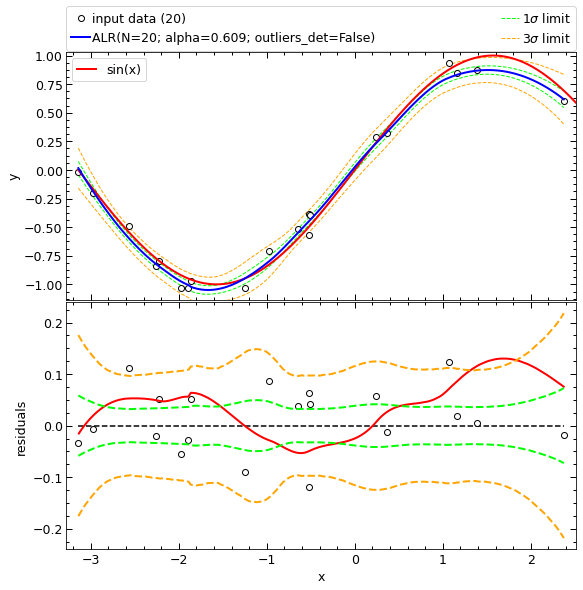

In [16]:
#don't worry about how plot_ALR works.
ALR1.plot(comparison_func=[{'x':x_func, 'y':func(x_func), 'label':func_name, 'color':'r'}])

As we can see, **ALR** provides a nice fit (blue line in the top panel) to the simulated data (empty circles) from the sine function (red line). Residuals around the **ALR** fit are plotted in the bottom panel. Green and orange dashed lines correspond to the $\pm1\sigma$ and $\pm3\sigma$ limits around the **ALR** fit, respectively. We see that the true function (red line) lies within the $\pm3\sigma$ limit. Let's see what happen if we increase the number of data

In [17]:
#it will take some seconds
x_new  = np.random.uniform(-np.pi, np.pi, 60)
y_new  = np.random.normal(func(x_new), sigma)
x2, y2 = np.append(x1, x_new), np.append(y1, y_new)
ALR2   = Automated_Loess_Regression(x2, y2)
x_new  = np.random.uniform(-np.pi, np.pi, 240)
y_new  = np.random.normal(func(x_new), sigma)
x3, y3 = np.append(x2, x_new), np.append(y2, y_new)
ALR3   = Automated_Loess_Regression(x3, y3)

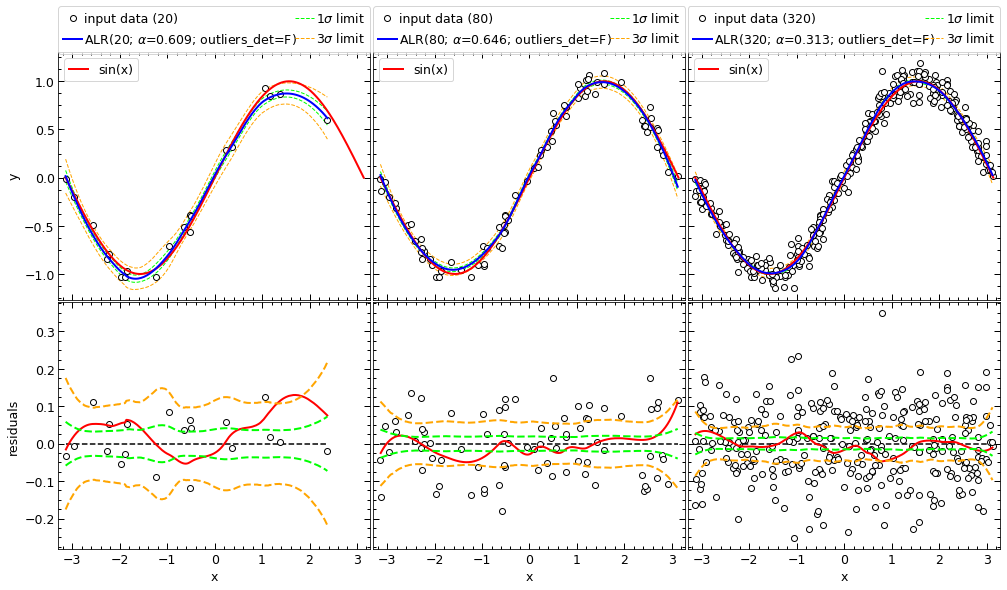

In [18]:
ALR1.plot([ALR1, ALR2, ALR3], comparison_func=[{'x':x_func, 'y':func(x_func), 'label':func_name, 'color':'r'}])

We see that the **ALR** result improves (it is more accurate and more precise) as the number of data increases (as expected). In the three examples, we see that the real function (red line) is within $\pm3\sigma$. Therefore, for this example of a sine function, the **ALR** fit is a good proxy for the real function within its error.

We can also test the **ALR** with a more elaborated function: $y=(x+x^2)\sin(x)$ 

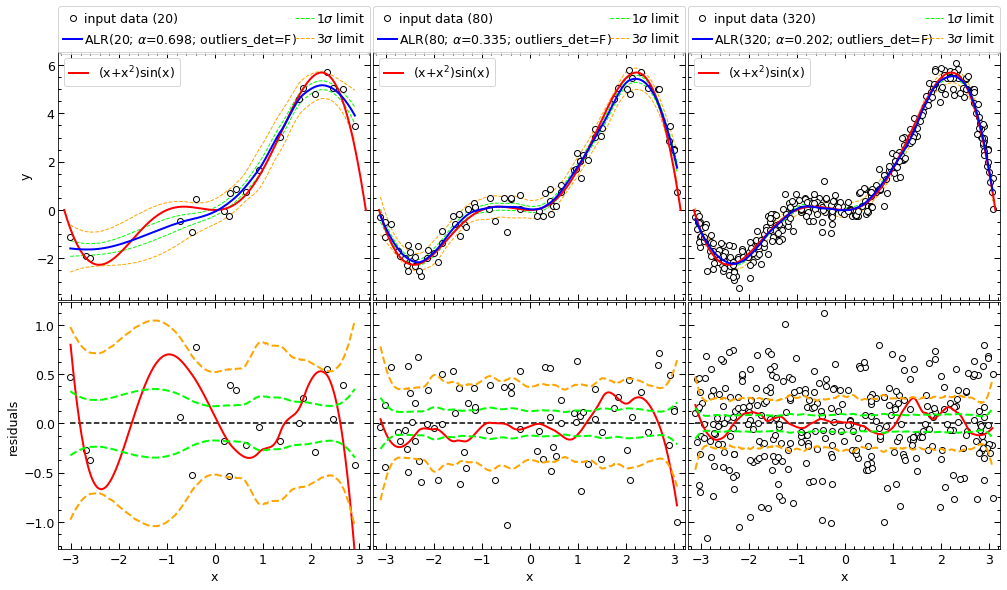

In [19]:
#it will take some seconds
np.random.seed(0)
func_name = '(x+x$^2$)sin(x)'
def func(x): return((x+x**2)*np.sin(x))
x_func = np.linspace(-np.pi, np.pi, 1000)
N, sigma = 20, 0.4
x1 = np.random.uniform(-np.pi, np.pi, N)
y1 = np.random.normal(func(x1), sigma)
ALR1   = Automated_Loess_Regression(x1, y1)
x_new  = np.random.uniform(-np.pi, np.pi, 60)
y_new  = np.random.normal(func(x_new), sigma)
x2, y2 = np.append(x1, x_new), np.append(y1, y_new)
ALR2   = Automated_Loess_Regression(x2, y2)
x_new  = np.random.uniform(-np.pi, np.pi, 240)
y_new  = np.random.normal(func(x_new), sigma)
x3, y3 = np.append(x2, x_new), np.append(y2, y_new)
ALR3   = Automated_Loess_Regression(x3, y3)
ALR1.plot([ALR1, ALR2, ALR3], comparison_func=[{'x':x_func, 'y':func(x_func), 'label':func_name, 'color':'r'}])

And we arrive to the same conclusion than in the previous example.

We could continue testing the **ALR** with more and more elaborated functions, but now it is better to start to apply the **ALR** to real data.

### 4.3.2) Real data
As mentioned before, I developed the **ALR** with the purpose of fitting light curves of SNe II. However, we will see that the **ALR** also works for other SN types. For example, the B-band photometry of the SN IIb 2011dh during the first $\sim100$ days

In [20]:
#don't worry about how read_example_data works.
JD, B, err_B = read_example_data('example_data/SNIIb_2011dh_B.dat', x_range=[[0.0, 100.0], 'lowest_x'])

Since the observations have errors in the y variable, we include them to compute the **ALR** fit setting `err_y=err_B`

In [21]:
ALR1 = Automated_Loess_Regression(x=JD, y=B, err_y=err_B)

Let's see the result

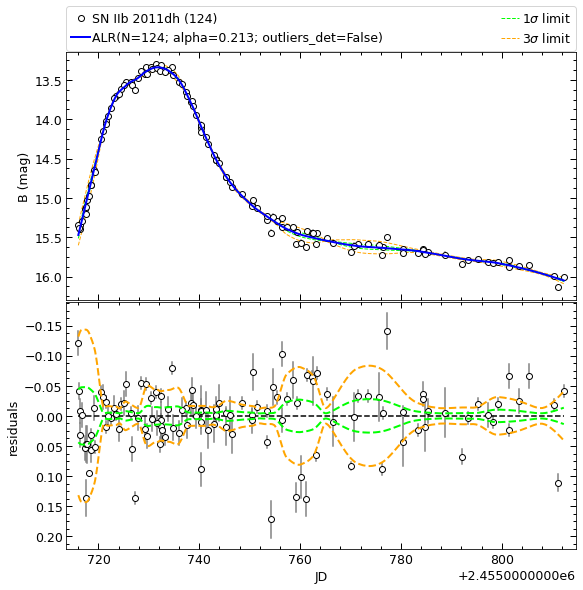

In [22]:
ALR1.plot(invert_y_axis=True, xlabel='JD', ylabel='B (mag)', object_name='SN IIb 2011dh')

The **ALR** fit looks quite good. However, we see that in some regions the confidence intervals are too broad. The latter could be an effect of outliers. To detect outliers and discard them, we set `outliers_det=True`

In [23]:
ALR2 = Automated_Loess_Regression(x=JD, y=B, err_y=err_B, outliers_det=True)

Let's compare the previous **ALR** fit (left) with the new one (right)

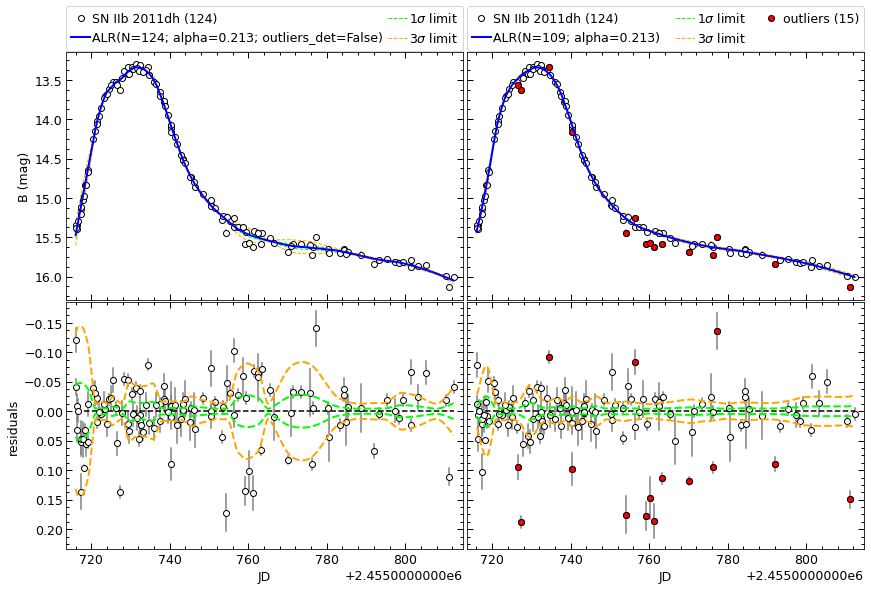

In [24]:
ALR1.plot([ALR1, ALR2], invert_y_axis=True, xlabel='JD', ylabel='B (mag)', object_name='SN IIb 2011dh')

The outliers found with the Tukey's rule are in red. We see that the confidence intervals improve when we activate the outliers detection. **For real data, I recommend to set `outliers_det=True` in order to remove outliers due to possible instrumental errors.** The price to pay is that more iterations are needed, so the execution of the **ALR** takes more time.

Let's try with other SN. The I-band photometry of the SN Ia 2005cf (with the outliers detection activated)

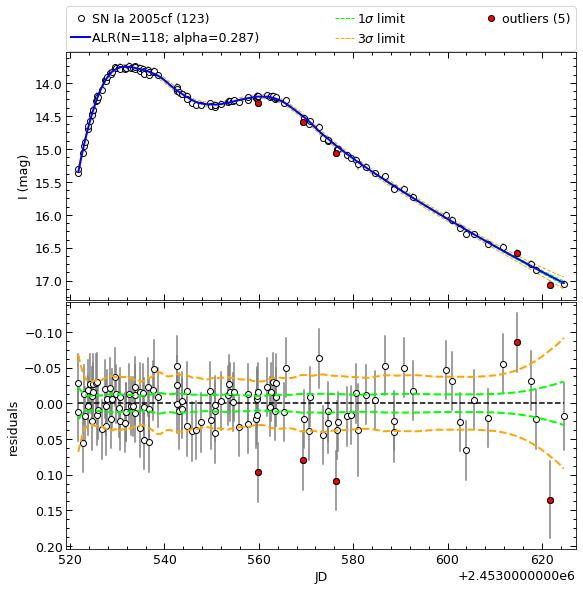

In [25]:
JD, I, err_I = read_example_data('example_data/SNIa_2005cf_I.dat')
ALR1 = Automated_Loess_Regression(x=JD, y=I, err_y=err_I, outliers_det=True)
ALR1.plot(invert_y_axis=True, xlabel='JD', ylabel='I (mag)', object_name='SN Ia 2005cf')

And the B-band photometry of the SN II 2017eaw during the first 120 days.

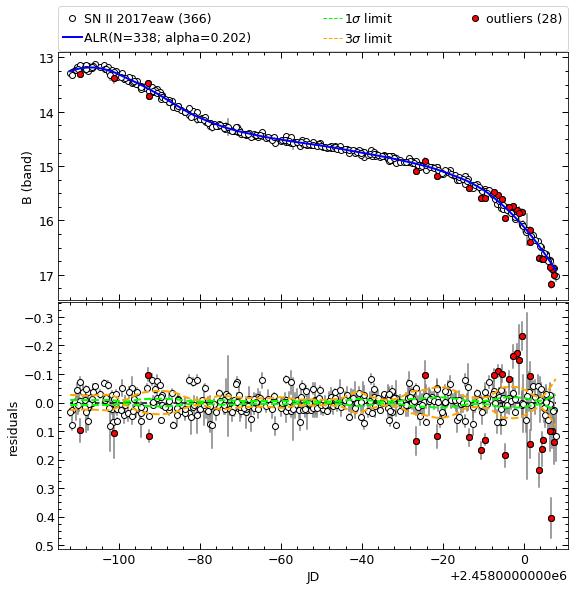

In [26]:
#It will take some seconds
JD, B, err_B = read_example_data('example_data/SNII_2017eaw_B.dat', x_range=[[0.0, 120.0], 'lowest_x'])
ALR = Automated_Loess_Regression(x=JD, y=B, err_y=err_B, outliers_det=True)
ALR.plot(invert_y_axis=True, xlabel='JD', ylabel='B (band)', object_name='SN II 2017eaw')

**ALR** is also useful to fit specific regions in spectra. For example, the region between 4900 and 5300 angstrom of the SN II 2002an (which contains the $\mathrm{FeII}\lambda5018$ and $\mathrm{FeII}\lambda5169$ lines)

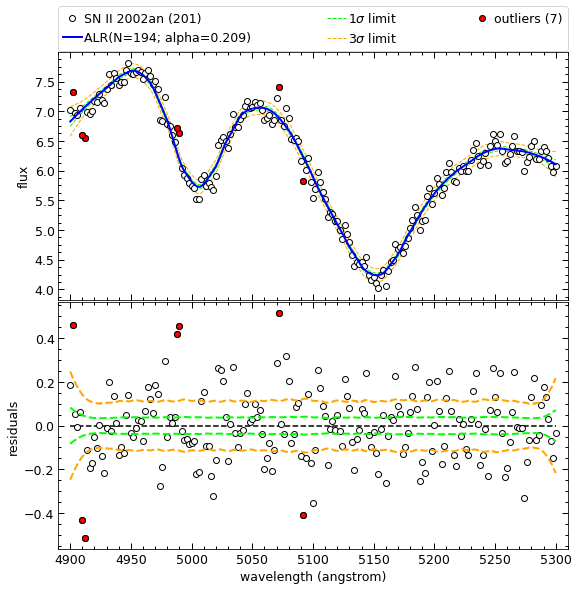

In [27]:
wavelength, flux = read_example_data('example_data/SNII_2002an_spectrum.dat', x_range=[[4900, 5300]],with_y_errors=False)
ALR = Automated_Loess_Regression(x=wavelength, y=flux, outliers_det=True) #0.077 99em
ALR.plot(xlabel='wavelength (angstrom)', ylabel='flux', object_name='SN II 2002an')

## 5) Improving the ALR results by modifing parameters

### 5.1) Enabling/disabling outliers detection

When the data is not dense enough, **ALR** and the outliers detection could not give a proper result. For example, the I-band photometry of the SN Ia 1998bu

In [28]:
JD, I, err_I = read_example_data('example_data/SNIa_1998bu_I.dat')
ALR1 = Automated_Loess_Regression(x=JD, y=I, err_y=err_I, outliers_det=True)

         Check the ALR fit to consider disabling the outliers detection.


We received a warning message that $38\%$ of the input data were detected as outliers, which is suspiciously high. In fact, plotting the result 

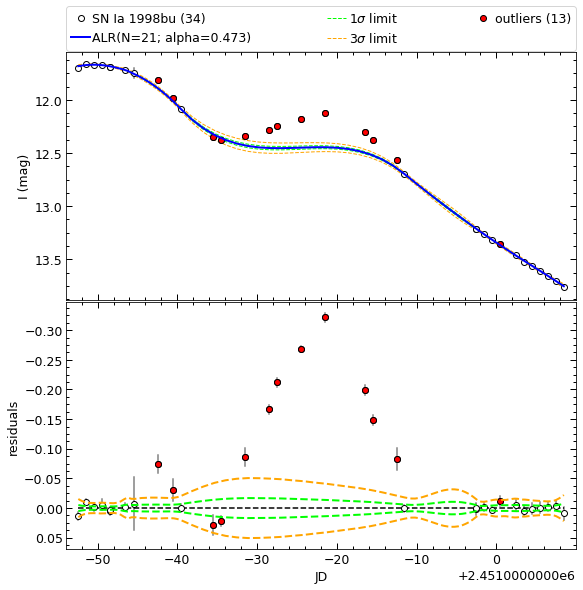

In [29]:
ALR1.plot(invert_y_axis=True, xlabel='JD', ylabel='I (mag)', object_name='SN Ia 1998bu')

Based on the shape of the light curve that we obtained for the SN Ia 2005cf (see previous example), red points in the interval JD+2.451e6=[-40, -10] are not outliers! If you are sure that there are not outliers in your data sample, then set `outliers_det=False` (the default option)

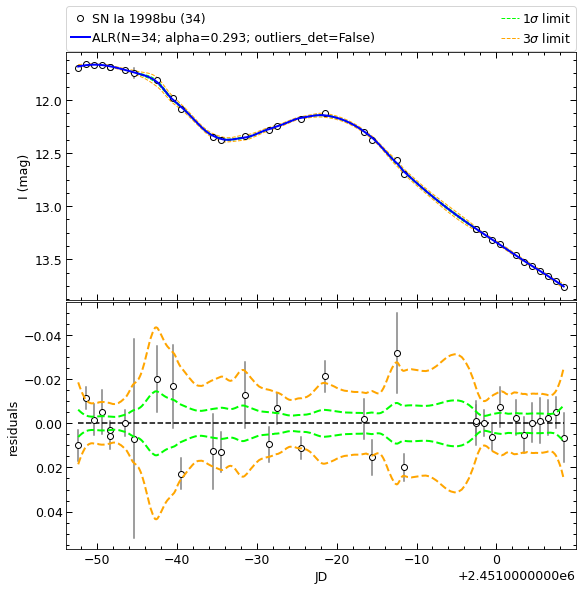

In [30]:
ALR2 = Automated_Loess_Regression(x=JD, y=I, err_y=err_I)
ALR2.plot(invert_y_axis=True, xlabel='JD', ylabel='I (mag)', object_name='SN Ia 1998bu')

The result is more consistent with the expected for an SN Ia in the I-band (like SN 2005cf). In this case we were able to compensate the lack of data points using **prior** information. 

### 5.2) Changing the order of the local polynomials

When only few data points are available, it is quite possible that **loess** cannot be able to perform a regression. For example, the V-band photometry of the SN II 1991al

         Performing linear interpolation between points.
         Consider using deg=1


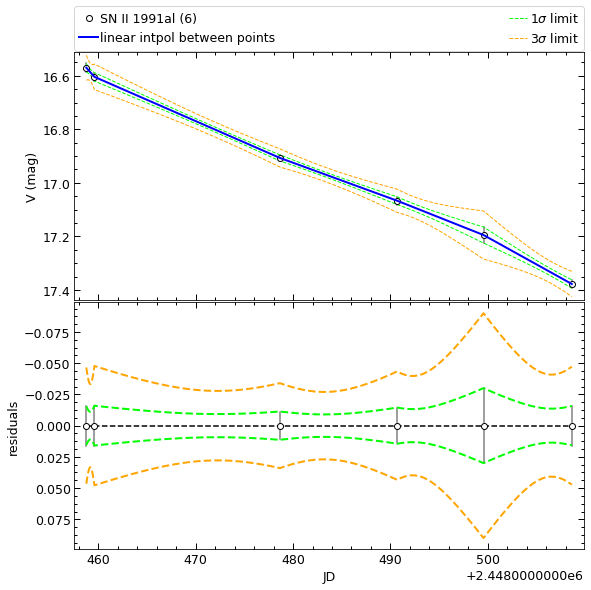

In [31]:
JD, V, err_V = read_example_data('example_data/SNII_1991al_V.dat')
ALR1 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, outliers_det=True)
ALR1.plot(invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 1991al')

We receive a warning message that the loess interpolation was not possible. In that case, the **ALR** just performs a linear interpolation between points. Despite the latter, in some cases **loess** can perform a fit to the data reducing the order of the local polynomials. For example, let's set `deg=1`

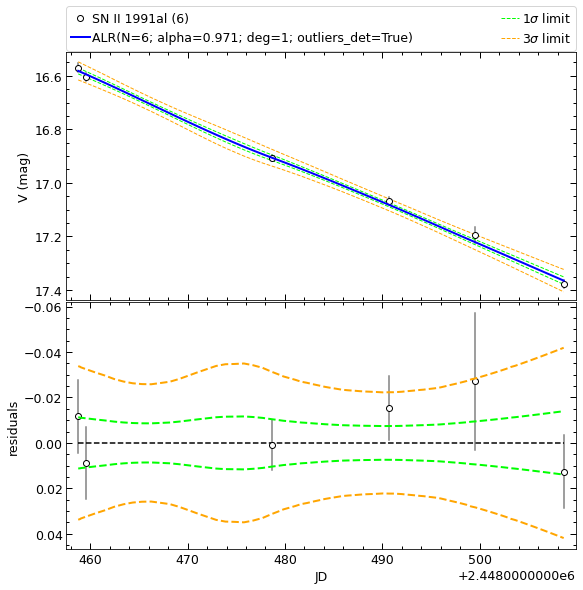

In [32]:
ALR2 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, deg=1, outliers_det=True)
ALR2.plot(invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 1991al')

We see that the **ALR** was able to find a solution with `deg=1`. In the case of SNe II, some regions of the V-band light curve are quite linear, as in this example. With that **prior** information, you can use the result with `deg=1` or, if you prefer, the linear interpolation between points. The decision is yours.

### 5.3) Choosing your own smoothing parameter

**Loess** uses a single alpha value to perform polynomial fits in all the local domains. Therefore, if the data is dominated by large-scale variations, then many small-scale variation will be missed. As example, we have the V-band photometry of the SN II 2017eaw during the first $\sim120$ days.

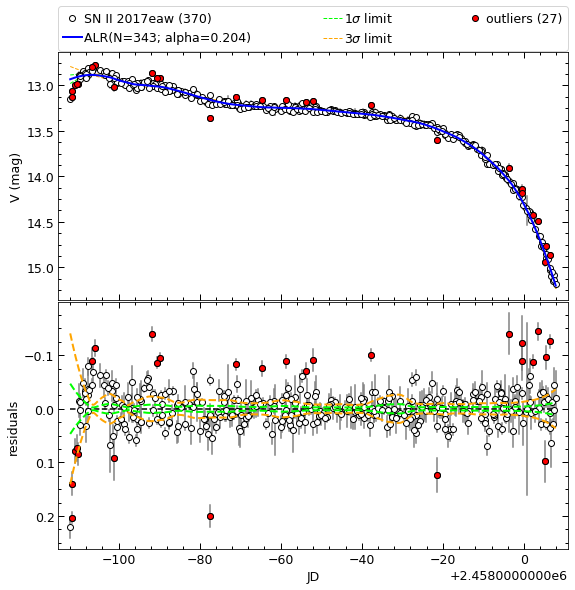

In [33]:
#it will take some seconds
JD, V, err_V = read_example_data('example_data/SNII_2017eaw_V.dat', x_range=[[0.0, 120.0],'lowest_x'])
ALR1 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, outliers_det=True)
ALR1.plot(invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 2017eaw')

The fit, in general, is quite good. However, we see that the variation at JD+2.458e6 $<$-100 is not captured by the **ALR**. Moreover, some points in that region are considered as outliers. Let's try again, but now disabling the outliers detection.

In [34]:
ALR2 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, outliers_det=False)

Let's compare this new **ALR** fit (right, `outliers_det=False`) with the previous one (left, `outliers_det=True`)

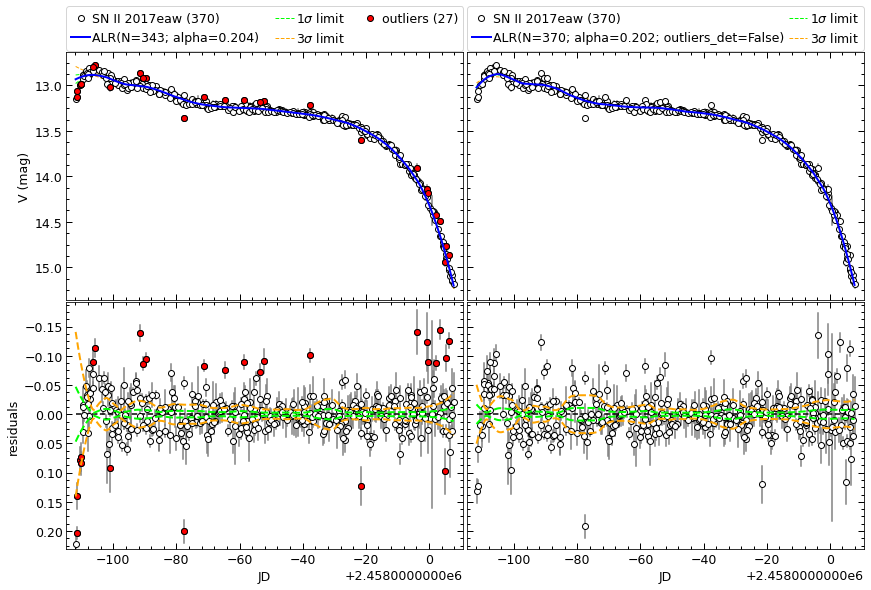

In [35]:
ALR1.plot([ALR1, ALR2], invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 2017eaw')

We see that the fit at JD+2.458e6 $<$-100 does not improve much when the outliers detection is disabled. Now, let's compute the **ALR** fit with the data in the region JD+2.458e6 $<$-100

In [36]:
JD, V, err_V = read_example_data('example_data/SNII_2017eaw_V.dat', x_range=[[0.0, 30.0],'lowest_x'])
ALR3 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V)

And let's compare this new **ALR** fit (right) with the previous one (left)

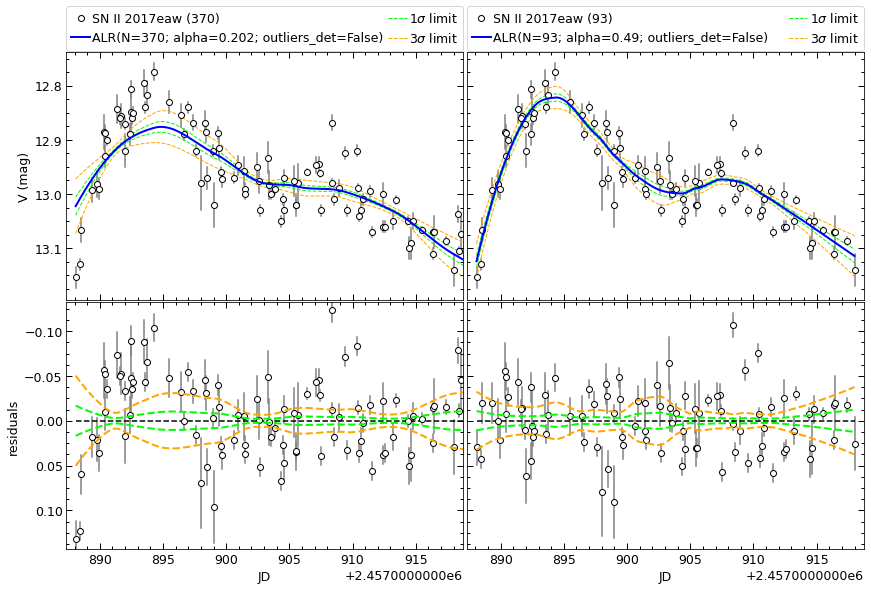

In [37]:
ALR2.plot([ALR2, ALR3], invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 2017eaw')

Comparing both results, we see that the "local" **ALR** (right) captures the trend not captured by the previous **ALR** fit (left). The reason? In the left panel, **ALR** uses $\mathrm{N}\cdot\mathrm{alpha}=370\cdot0.202\approx75$ data points for each local polynomial fit, while in the right panel **ALR** uses $\mathrm{N}\cdot\mathrm{alpha}=93\cdot0.49\approx46$ data points. This means that in the case of N=370 and alpha=0.202 (left), the local domains are 75/46=1.63 times larger than the necessary to characterize the small-scale variations, so the latter are lost. If you want to perform an **ALR** fit and not lose the small-scale variations, you need to rescale the alpha value. In our case, alpha=0.202/1.63=0.124. To perform an **ALR** fit with this specific alpha value, set `alpha=0.124`

In [38]:
JD, V, err_V = read_example_data('example_data/SNII_2017eaw_V.dat', x_range=[[0.0, 120.0],'lowest_x'])
ALR4 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, alpha=0.124, outliers_det=True)

Let's compare the ALR fit with `alpha=0.124` (right) with the first one (`alpha=0.204`, left)

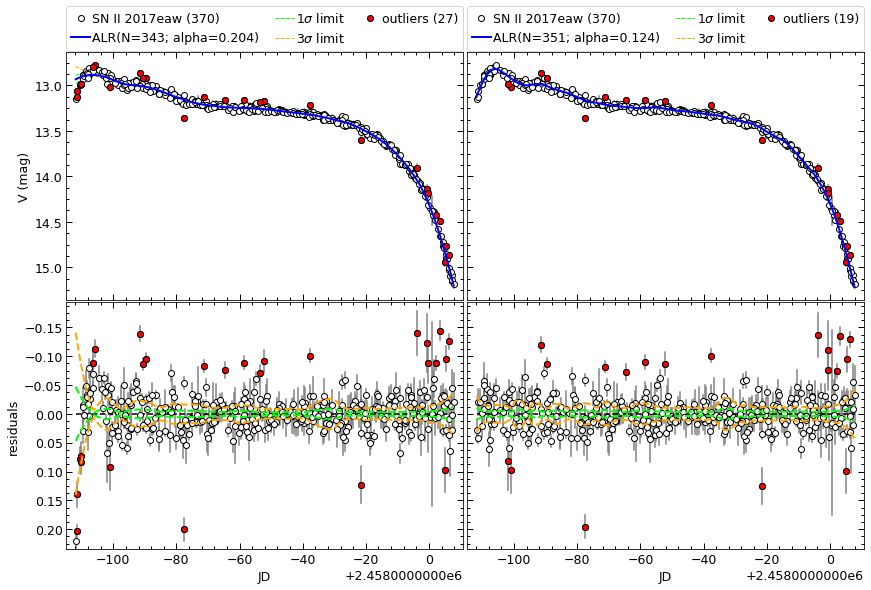

In [39]:
ALR1.plot([ALR1, ALR4], invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 2017eaw')

As we can see, the **ALR** fit with `alpha=0.124` (right) captures the small-scale variations observed at JD+2.458e6$<$-100 (as expected), which were not captured in the first attemp (left). The same fit can be done automatically by setting `alpha=[0, 2457918]`

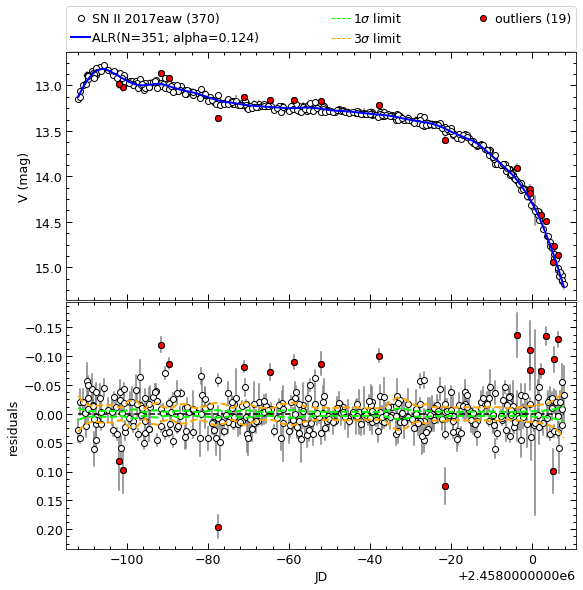

In [40]:
ALR5 = Automated_Loess_Regression(x=JD, y=V, err_y=err_V, alpha=[0,2457918], outliers_det=True)
ALR5.plot(invert_y_axis=True, xlabel='JD', ylabel='V (mag)', object_name='SN II 2017eaw')

## 6) A simple comparison between ALR and Gaussian process regression

(Note: for this comparison you need to have installed sklearn. It can be installed executing `pip3 install scikit-learn`)

Now that you know how to use the **ALR**, you can compare it with other non-parametric regression methods. For example, one of the most used in astronomy is the Gaussian process regression (**GPR**). For the comparison, we will use a cosine function

In [41]:
import numpy as np
np.random.seed(1)
func_name = 'cos(x)'
def func(x): return(np.cos(x))
x_func = np.linspace(0, 10, 1000)

Following [this example](https://www.astroml.org/book_figures/chapter8/fig_gp_example.html), let's generate 20 (x, y) values from the cosine function, where the y values in the cosine function are normally distributed with $\sigma=0.2$

In [42]:
N, dy = 20, 0.2
x = np.linspace(0, 10, N)
y = np.random.normal(func(x), dy)

We compute the **ALR** fit

In [43]:
ALR1 = Automated_Loess_Regression(x, y, err_y=dy)

Now we perform a **GPR**.

In [44]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
kernel = kernels.RBF(0.5, (0.01, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, alpha=(dy/y) ** 2, random_state=0)
gpr.fit(x[:, None], y)
f, err_f = gpr.predict(x_func[:, None], return_std=True)

Let's see the result

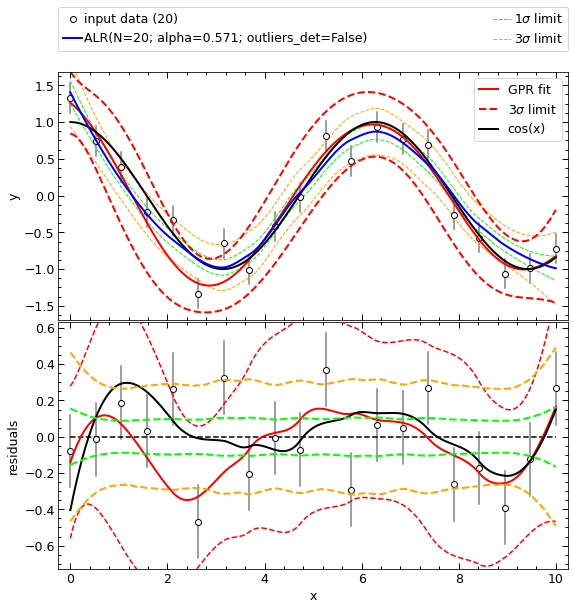

In [45]:
ALR1.plot(invert_y_axis=False, comparison_func=[{'x':x_func, 'y':f, 'err_y':err_f, 'label':'GPR fit', 'color':'r'},{'x':x_func, 'y':func(x_func), 'label':func_name, 'color':'k'}])

Wee see that both the cosine function (black line) and the **GPR** (red solid line) fit are within $\pm3\sigma$ around the **ALR** fit. You can compare the **ALR** with the **GPR** using other functions, even with real data. However, to perform a **GPR** it is necessary to define an specific kernel for the data, which is not always straightforward. There are ways to do this kernel selection, but they are out of the scope of this tutorial focused on the **ALR**.